In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

```{index} sensitivity analysis
```

```{index} equilibrium analysis
```

```{index} Perelson's immunological HIV model
```

# JNB Lab Solutions 

Problem 1

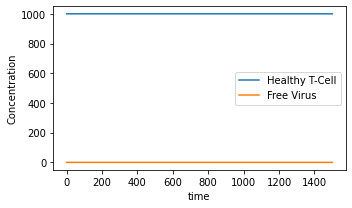

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k1 = 10**(-6)       
k2=3*10**(-3)
N=500

# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)

# Bundle parameters for ODE solver
params = [s,r,Tmax,muT,mub,muV,k1,k2,N]

# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(5,3))
plt.plot(t, psoln[:,0],label='Healthy T-Cell')
plt.plot(t, psoln[:,3],label='Free Virus')
plt.legend()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("Ex1.png")
plt.tight_layout()
plt.show()

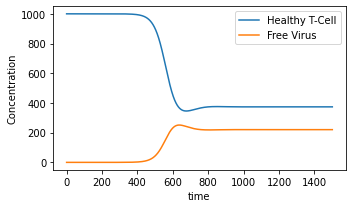

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k1 = 10**(-4)       
k2=3*10**(-3)
N=500

# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)

# Bundle parameters for ODE solver
params = [s,r,Tmax,muT,mub,muV,k1,k2,N]

# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(5,3))
plt.plot(t, psoln[:,0],label='Healthy T-Cell')
plt.plot(t, psoln[:,3],label='Free Virus')
plt.legend()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("Ex1.png")
plt.tight_layout()
plt.show()

When $k1=10^{-6}$, we do not see the onset of AIDS.  On the other hand, when $k1=10^{-4}$, the onset of AIDS occurs at around day 500.

Problem 2

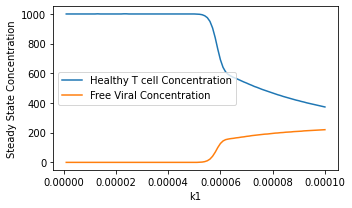

In [8]:
def f(y, t, params):
    T, T1,T2, V = y      # unpack current values of y
    s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
    derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
    return derivs

# Parameters
s=10
r=.03
Tmax=1500
muT=.02
mub=.24
muV=2.4
k2=3*10**(-3)
N=500
# Initial values
T0=1000
T10=0
T20=0
V0=10**(-3)
# Bundle initial conditions for ODE solver
y0 = [T0,T10,T20,V0]

# Make time array for solution
tStop = 1501.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# k1 values
k1val=np.arange(10**(-6),10**(-4),.000001)
Tval=np.arange(0,100,1)
Vval=np.arange(0,100,1)

for i in np.arange(0,100,1):
    # Bundle parameters for ODE solver
    params = [s,r,Tmax,muT,mub,muV,k1val[i],k2,N]
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    Tval[i]=psoln[30000,0]
    Vval[i]=psoln[30000,3]
    
fig = plt.figure(1, figsize=(5,3))
plt.plot(k1val, Tval,label='Healthy T cell Concentration')
plt.plot(k1val, Vval,label='Free Viral Concentration')
plt.legend()
plt.xlabel('k1')
plt.ylabel('Steady State Concentration')
plt.savefig("k1sa.png")
plt.tight_layout()
plt.show()

Problem 3

In [9]:
#part a)
def treatment(i,j):
    def f(y, t, params):
        T, T1,T2, V = y      # unpack current values of y
        s,r,Tmax,muT,mub,muV,k1,k2,N= params  # unpack parameters
        derivs = [s+r*T*(1-(T+T1+T2)/Tmax)-muT*T-k1*T*V,   # list of dy/dt=f functions
             k1*T*V-muT*T1-k2*T1,
             k2*T1-mub*T2,
             N*mub*T2-k1*T*V-muV*V]
        return derivs

    # Parameters
    s=10
    r=.03
    Tmax=1500
    muT=.02
    mub=.24
    muV=2.4
    k2=3*10**(-3)
    N=100+i
    k1=j*10**(-5)
    # Initial values
    T0=1000
    T10=0
    T20=0
    V0=10**(-3)
    # Bundle initial conditions for ODE solver
    y0 = [T0,T10,T20,V0]

    # Make time array for solution
    tStop = 1501.
    tInc = 0.05
    t = np.arange(0., tStop, tInc)

    # Bundle parameters for ODE solver
    params = [s,r,Tmax,muT,mub,muV,k1val[i-1],k2,N]
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    Tss=psoln[30000,0]
    return Tss

In [10]:
# part b)
Z=np.eye(101, 21)
for i in np.arange(1,101,1):
    for j in np.arange(1,21,1):
        Z[i,j]=treatment(i,j)
Z[10,5] # steady state T-cell concentration when N=100, k1= 5 * 10**(-5)

999.9999999998947

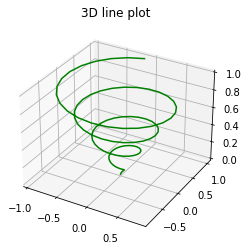

In [11]:
# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()

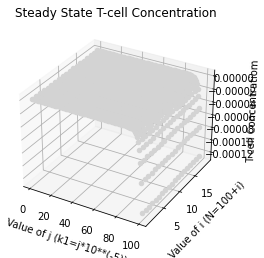

In [12]:
# part c)

# Creating dataset
x=np.arange(0,100,1)
y=np.arange(0,20,1)
z=Z

# Creating figure
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
for i in np.arange(1,100,1):
    for j in np.arange(1,20,1):
        ax.scatter(i, j, Z[i,j],color='lightgray')
ax.set_title('Steady State T-cell Concentration')
ax.set_xlabel('Value of j (k1=j*10**(-5))')
ax.set_ylabel('Value of i (N=100+i)')
ax.set_zlabel('T cell Concentratiom')
plt.show()
 


The graph shows the dramatic reduction of T-cell count when the values or  ùëõ
  and/or  ùëò1
  become sufficiently large.